In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


In [202]:
# 1. Aquisição e leitura dos dados
data = pd.read_csv('vinhos.csv')

In [45]:
data[column].dtype

dtype('O')

In [45]:
# 2. Análise exploratória
# Examine as principais características da base de dados, como estatísticas descritivas e gráficos.

# 3. Preparação dos dados
# Escolha uma das atividades de classificação (a ou b) e prepare os dados de acordo.

# a. Classificação de vinho do tipo 'tinto' ou 'branco'
# Selecione as features relevantes e os rótulos (tinto ou branco).

# Ou

# b. Classificação entre os vinhos com qualidade superior ou inferior a 6
# Defina os critérios para "qualidade superior" e "inferior" e crie os rótulos correspondentes.

In [145]:
desc_stats = data.describe()

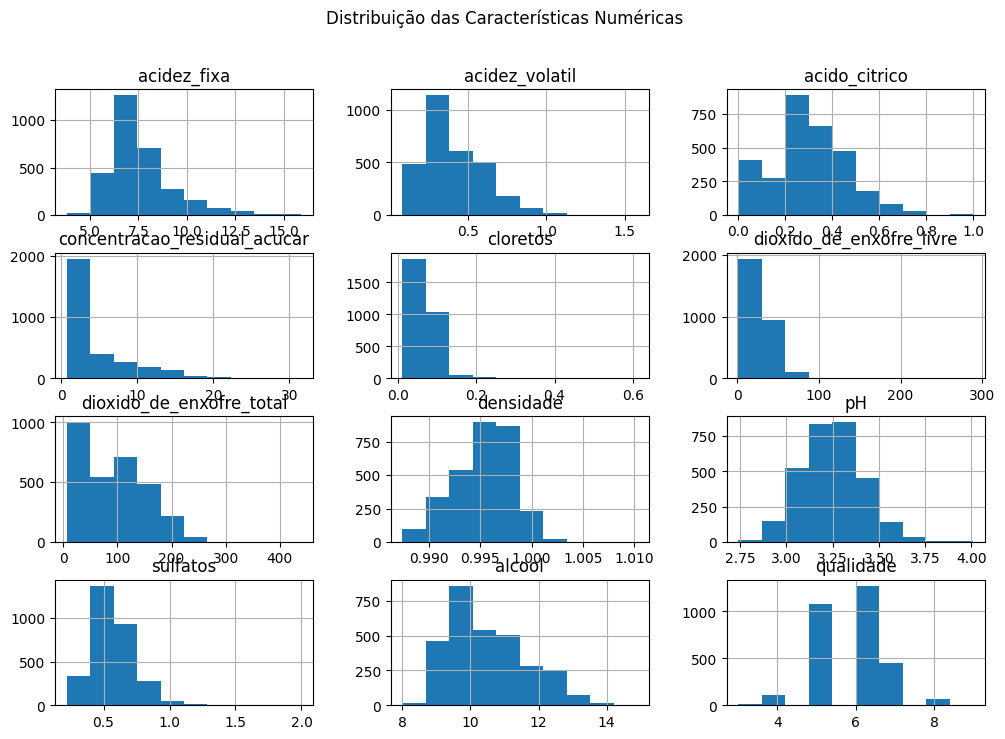

In [47]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.hist(figsize=(12, 8))
plt.suptitle("Distribuição das Características Numéricas")
plt.show()

In [48]:
sns.pairplot(data=numeric_features)
plt.suptitle("Relações entre Características Numéricas")
plt.show()

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


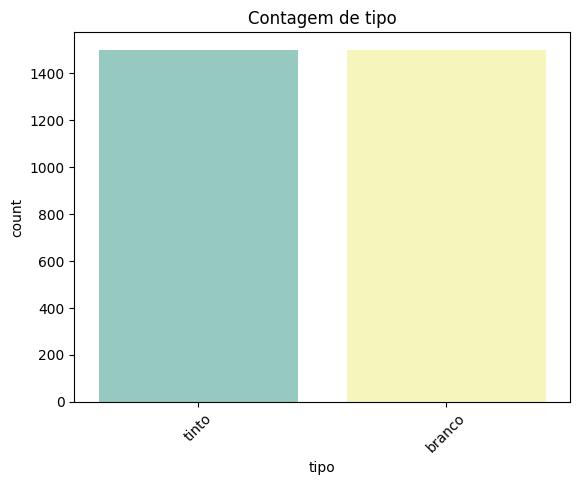

In [113]:
# Visualize a contagem das características categóricas usando gráficos de barras
categorical_features = data.select_dtypes(exclude=[np.number])
for column in categorical_features.columns:
    #if isinstance(data[column].dtype, pd.CategoricalDtype):
        sns.countplot(x=column, data=data, palette="Set3")
        plt.title(f"Contagem de {column}")
        plt.xticks(rotation=45)
        plt.show()

In [205]:
data['rotulo'] = np.where(data['qualidade'] >= 6, 'superior', 'inferior')

In [206]:
features = data[['tipo']]

In [207]:
labels = data['rotulo']

In [208]:
print(data.head())

   acidez_fixa  acidez_volatil  acido_citrico  concentracao_residual_acucar  \
0          8.9           0.745           0.18                           2.5   
1          7.5           0.520           0.42                           2.3   
2          8.3           0.300           0.49                           3.8   
3          7.8           0.910           0.07                           1.9   
4          7.2           0.340           0.32                           2.5   

   cloretos  dioxido_de_enxofre_livre  dioxido_de_enxofre_total  densidade  \
0     0.077                      15.0                      48.0    0.99739   
1     0.087                       8.0                      38.0    0.99720   
2     0.090                      11.0                      24.0    0.99498   
3     0.058                      22.0                      47.0    0.99525   
4     0.090                      43.0                     113.0    0.99660   

     pH  sulfatos  alcool  qualidade   tipo    rotulo  


In [263]:
X = data.drop(['tipo', 'qualidade'], axis=1)  # Features

In [264]:
y = data['tipo']  # ou y = df['qualidade']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
print("Conjunto de Treino - Features (X_train):")
print(X_train.head()) 

Conjunto de Treino - Features (X_train):
      acidez_fixa  acidez_volatil  acido_citrico  \
642           7.5            0.57           0.02   
700           6.7            0.64           0.23   
226           6.7            0.46           0.24   
1697          7.5            0.41           0.23   
1010          7.0            0.65           0.02   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
642                            2.6     0.077                      11.0   
700                            2.1     0.080                      11.0   
226                            1.7     0.077                      18.0   
1697                          14.8     0.054                      28.0   
1010                           2.1     0.066                       8.0   

      dioxido_de_enxofre_total  densidade    pH  sulfatos  alcool  rotulo  
642                       35.0    0.99557  3.36      0.62    10.8     NaN  
700                      119.0    0.99538  3.36  

In [282]:
print("\nConjunto de Teste - Features (X_test):")
print(X_test.head()) 


Conjunto de Teste - Features (X_test):
      acidez_fixa  acidez_volatil  acido_citrico  \
1801          7.0            0.23           0.35   
1190          5.6            0.66           0.00   
1817          5.1            0.30           0.30   
251          11.9            0.57           0.50   
2505          6.4            0.50           0.20   

      concentracao_residual_acucar  cloretos  dioxido_de_enxofre_livre  \
1801                           1.4     0.036                      31.0   
1190                           2.2     0.087                       3.0   
1817                           2.3     0.048                      40.0   
251                            2.6     0.082                       6.0   
2505                           2.4     0.059                      19.0   

      dioxido_de_enxofre_total  densidade    pH  sulfatos  alcool  rotulo  
1801                     113.0    0.99120  3.16      0.48    10.8     NaN  
1190                      11.0    0.99378  3.71   

In [283]:
print("\nConjunto de Treino - Rótulos (y_train):")
print(y_train.head()) 


Conjunto de Treino - Rótulos (y_train):
642      tinto
700      tinto
226      tinto
1697    branco
1010     tinto
Name: tipo, dtype: object


In [302]:
print("\nConjunto de Teste - Rótulos (y_test):")
print(y_test.head())


Conjunto de Teste - Rótulos (y_test):
1801    branco
1190     tinto
1817    branco
251      tinto
2505    branco
Name: tipo, dtype: object


In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [317]:
svm_model = SVC(C=1,kernel='linear')

In [318]:
svm_model

SVC(C=1, kernel='linear')

In [319]:
SVC(C=1, kernel='linear')

SVC(C=1, kernel='linear')

In [322]:
print(X_train.isna().sum())
print(y_train.isna().sum())

acidez_fixa                        0
acidez_volatil                     0
acido_citrico                      0
concentracao_residual_acucar       0
cloretos                           0
dioxido_de_enxofre_livre           0
dioxido_de_enxofre_total           0
densidade                          0
pH                                 0
sulfatos                           0
alcool                             0
rotulo                          2400
dtype: int64
0


In [324]:
X_train.fillna(X_train.mean(), inplace=True)  # Preencher com a média
y_train.fillna(y_train.mode()[0], inplace=True)  # Preencher com a moda

In [326]:
svm_model.fit(X_train, y_train)

ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values